In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib as mpl

In [2]:
def lake_water_density(temp_C, cond_mS_cm):
    """
    Estimate lake water density based on temperature (°C) and conductivity (mS/cm).
    
    Parameters:
        temp_C: Temperature in °C (scalar or array)
        cond_mS_cm: Conductivity in mS/cm (scalar or array)
    
    Returns:
        Density in kg/m³
    """
    rho_0 = 1000           # Reference density of freshwater at 4°C [kg/m³]
    alpha = 2e-4           # Thermal expansion coefficient [°C⁻¹]
    beta = 0.8             # Salinity influence coefficient
    T0 = 4                # Reference temperature [°C]
    salinity = 0.012 * cond_mS_cm  # Estimate salinity from conductivity [g/kg]
    
    density = rho_0 * (1 - alpha * (temp_C - T0) + beta * salinity / 1000)
    return density

In [3]:
# Create a grid for general density surface
temp_vals = np.linspace(7, 12, 100)        # Temperature range (°C)
cond_vals = np.linspace(.284,.319, 100)         # Conductivity range (mS/cm)
T, C = np.meshgrid(temp_vals, cond_vals)   # Meshgrid for surface
rho = lake_water_density(T, C)             # Compute density

# Stagecoach Reservoir values
stagecoach_temp = 11.15                             # °C
stagecoach_cond = np.linspace(307, 315, 100) / 1000    # Convert µS/cm to mS/cm
stagecoach_density = lake_water_density(stagecoach_temp, stagecoach_cond)

In [4]:
total_df = pd.read_csv('../data/total_df.csv') # load in data

# Keystone Cove
KEY_Full = total_df[total_df['Area'] == 'KEY'].copy() # filter by area
KEY_Full['UTC Time'] = pd.to_datetime(KEY_Full['UTC Time'])
KEY_18 = KEY_Full[KEY_Full['UTC Time'].dt.date == pd.to_datetime('2025-05-18').date()]

# Harding Cove
HAR_Full = total_df[total_df['Area'] == 'HAR'].copy()
HAR_Full['UTC Time'] = pd.to_datetime(HAR_Full['UTC Time'])
HAR_17 = HAR_Full[HAR_Full['UTC Time'].dt.date == pd.to_datetime('2025-05-17').date()]

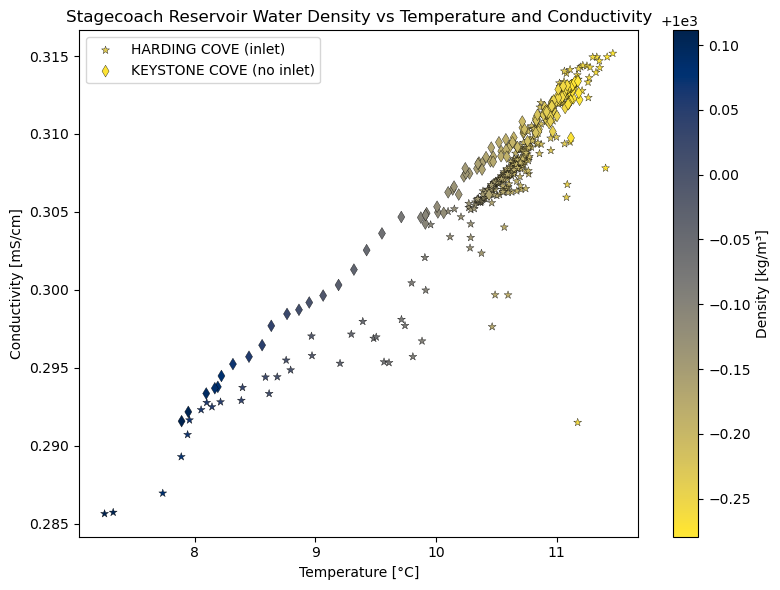

In [5]:
# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
# contour = ax.contourf(T, C, rho, levels=50, cmap="Blues")


# Plot Stagecoach data
plot = ax.scatter(HAR_17['Temperature (°C)'], HAR_17['Conductivity (µS/cm)']/1000, c=HAR_17['Density (kg/m³)'], 
           cmap='cividis_r', label='HARDING COVE (inlet)', marker="*", edgecolors= 'k', linewidths=0.25)
ax.scatter(KEY_18['Temperature (°C)'], KEY_18['Conductivity (µS/cm)']/1000, c=KEY_18['Density (kg/m³)'], 
           cmap='cividis_r', label='KEYSTONE COVE (no inlet)', marker='d', edgecolors='k', linewidths=0.25)

cbar = fig.colorbar(plot, ax=ax)
cbar.set_label('Density [kg/m³]')

# Labels and legend
ax.set_title('Stagecoach Reservoir Water Density vs Temperature and Conductivity')
#ax.set_xlim(7, 12)
ax.set_xlabel('Temperature [°C]')
#ax.set_ylim(.29, .316)
ax.set_ylabel('Conductivity [mS/cm]')
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()

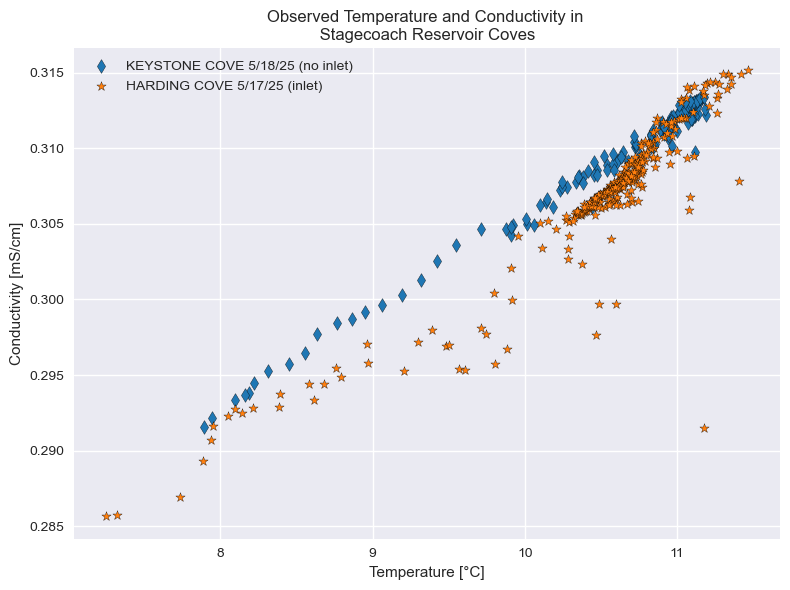

In [23]:
# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
mpl.style.use('seaborn-v0_8-dark')

# Plot Stagecoach data
ax.scatter(KEY_18['Temperature (°C)'], KEY_18['Conductivity (µS/cm)']/1000, c='tab:blue',
            label='KEYSTONE COVE 5/18/25 (no inlet)', marker='d', edgecolors='k', linewidths=0.25)
ax.scatter(HAR_17['Temperature (°C)'], HAR_17['Conductivity (µS/cm)']/1000, c='tab:orange', 
           label='HARDING COVE 5/17/25 (inlet)', marker="*", edgecolors= 'k', linewidths=0.25)


# Labels and legend
ax.set_title('Observed Temperature and Conductivity in \n Stagecoach Reservoir Coves ')
#ax.set_xlim(7, 12)
ax.set_xlabel('Temperature [°C]')
#ax.set_ylim(.29, .316)
ax.set_ylabel('Conductivity [mS/cm]')
ax.legend(loc='upper left')
plt.tight_layout()

fig.savefig('tempcond-HARKEY.jpg')
plt.show()

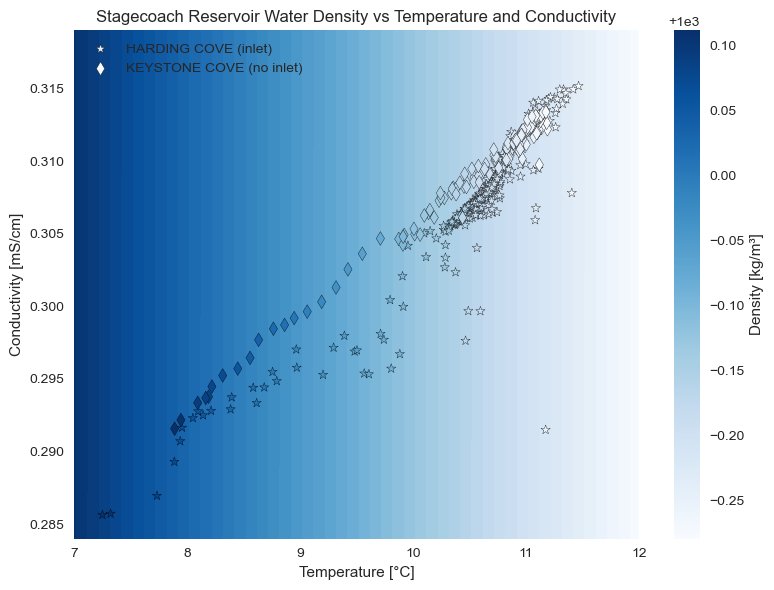

In [20]:
# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(T, C, rho, levels=50, cmap="Blues")

# Plot Stagecoach data
plot = ax.scatter(HAR_17['Temperature (°C)'], HAR_17['Conductivity (µS/cm)']/1000, c=HAR_17['Density (kg/m³)'], 
           cmap='Blues', label='HARDING COVE (inlet)', marker="*", edgecolors= 'k', linewidths=0.25)
ax.scatter(KEY_18['Temperature (°C)'], KEY_18['Conductivity (µS/cm)']/1000, c=KEY_18['Density (kg/m³)'], 
           cmap='Blues', label='KEYSTONE COVE (no inlet)', marker='d', edgecolors='k', linewidths=0.25)

cbar = fig.colorbar(plot, ax=ax)
cbar.set_label('Density [kg/m³]')

# Labels and legend
ax.set_title('Stagecoach Reservoir Water Density vs Temperature and Conductivity')
#ax.set_xlim(7, 12)
ax.set_xlabel('Temperature [°C]')
#ax.set_ylim(.29, .316)
ax.set_ylabel('Conductivity [mS/cm]')
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()